<a href="https://colab.research.google.com/github/pkdyn/ManningVsReilly/blob/main/bkCvrs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os

import tensorflow as tf
print (tf.__version__)
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions


2.5.0


In [2]:

!wget --no-check-certificate \
https://github.com/pkdyn/ManningVsReilly/archive/refs/heads/main.zip 
!unzip -q /content/main.zip
!rm /content/main.zip



--2021-07-10 07:44:53--  https://github.com/pkdyn/ManningVsReilly/archive/refs/heads/main.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/pkdyn/ManningVsReilly/zip/refs/heads/main [following]
--2021-07-10 07:44:53--  https://codeload.github.com/pkdyn/ManningVsReilly/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [ <=>                ]   4.51M  25.3MB/s    in 0.2s    

2021-07-10 07:44:53 (25.3 MB/s) - ‘main.zip’ saved [4725179]



In [3]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=30.0,
    height_shift_range=30.0,
    shear_range=10.0,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2, 
    preprocessing_function=preprocess_input) 

train_ds = train_datagen.flow_from_directory(
    "/content/ManningVsReilly-main/cvr_ds/train",
    target_size=(100, 100),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='training') 

val_ds = train_datagen.flow_from_directory(
    "/content/ManningVsReilly-main/cvr_ds/train", 
    target_size=(100, 100),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='validation') 



Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [4]:
def make_model(learning_rate, droprate, size):
    base_model = Xception(
        weights='imagenet',
        input_shape=(100, 100, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(100, 100, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(1, activation='sigmoid')(drop)
    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=["accuracy"],
    )
    
    return model

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/15
15/15 [==============================] - 35s 214ms/step - loss: 0.4364 - accuracy: 0.8583 - val_loss: 0.2499 - val_accuracy: 0.9167
Epoch 2/15
15/15 [==============================] - 2s 136ms/step - loss: 0.1960 - accuracy: 0.9563 - val_loss: 0.1809 - val_accuracy: 0.9417
Epoch 3/15
15/15 [==============================] - 2s 140ms/step - loss: 0.1100 - accuracy: 0.9750 - val_loss: 0.1176 - val_accuracy: 0.9667
Epoch 4/15
15/15 [==============================] - 2s 142ms/step - loss: 0.0852 - accuracy: 0.9812 - val_loss: 0.0792 - val_accuracy: 0.9917
Epoch 5/15
15/15 [==============================] - 2s 145ms/step - loss: 0.0684 - accuracy: 0.9896 - val_loss: 0.0792 - val_accuracy: 0.9917
Epoch 6/15
15/15 [==============================] - 2s 143ms/step - loss: 0.0783 - accuracy: 0.9750 - val_loss: 0.0651 - val_accuracy: 0.9750
Epoch 7/15
15/15 [==============================] - 2s 135ms/step - loss: 0.0573 -

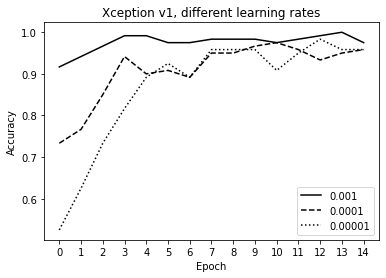

In [ ]:
model = make_model(learning_rate=0.001, droprate=0.0, size=10)
history_0_001 = model.fit(train_ds, epochs=15, validation_data=val_ds)
model = make_model(learning_rate=0.0001, droprate=0.0, size=10)
history_0_0001 = model.fit(train_ds, epochs=15, validation_data=val_ds)


epochs = np.arange(15)
val_0_001 = history_0_001.history['val_accuracy']
val_0_0001 = history_0_0001.history['val_accuracy']



plt.figure(figsize=(6, 4))

plt.plot(epochs, val_0_001, color='blue', linestyle='solid', label='0.001')
plt.plot(epochs, val_0_0001, color='green', linestyle='solid', label='0.0001')
plt.title('Xception v1, different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)
plt.legend()
plt.show()

83689472/83683744 [==============================] - 0s 0us/step
Epoch 1/15
15/15 [==============================] - 35s 210ms/step - loss: 0.6505 - accuracy: 0.6417 - val_loss: 0.4791 - val_accuracy: 0.8833
Epoch 2/15
15/15 [==============================] - 2s 129ms/step - loss: 0.4614 - accuracy: 0.8083 - val_loss: 0.3214 - val_accuracy: 0.9333
Epoch 3/15
15/15 [==============================] - 2s 129ms/step - loss: 0.3824 - accuracy: 0.8542 - val_loss: 0.2504 - val_accuracy: 0.9667
Epoch 4/15
15/15 [==============================] - 2s 135ms/step - loss: 0.3390 - accuracy: 0.8813 - val_loss: 0.2146 - val_accuracy: 0.9750
Epoch 5/15
15/15 [==============================] - 2s 133ms/step - loss: 0.3153 - accuracy: 0.8771 - val_loss: 0.1601 - val_accuracy: 0.9750
Epoch 6/15
15/15 [==============================] - 2s 133ms/step - loss: 0.3190 - accuracy: 0.8792 - val_loss: 0.1729 - val_accuracy: 0.9917
Epoch 7/15
15/15 [==============================] - 2s 134ms/step - loss: 0.2460 -

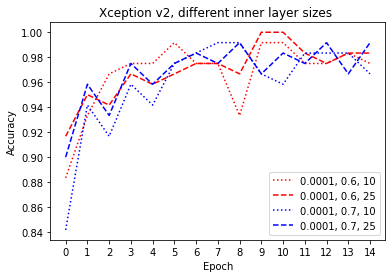

In [5]:

model = make_model(learning_rate=0.001, droprate=0.6, size=10)
history_10_6_001 = model.fit(train_ds, epochs=15, validation_data=val_ds)
model = make_model(learning_rate=0.001, droprate=0.6, size=25)
history_25_6_001 = model.fit(train_ds, epochs=15, validation_data=val_ds)


model = make_model(learning_rate=0.001, droprate=0.7, size=10)
history_10_7_001 = model.fit(train_ds, epochs=15, validation_data=val_ds)
model = make_model(learning_rate=0.001, droprate=0.7, size=25)
history_25_7_001 = model.fit(train_ds, epochs=15, validation_data=val_ds)


epochs = np.arange(15)
val_10_6_001 = history_10_6_001.history['val_accuracy']
val_25_6_001 = history_25_6_001.history['val_accuracy']

val_10_7_001 = history_10_7_001.history['val_accuracy']
val_25_7_001 = history_25_7_001.history['val_accuracy']

plt.figure(figsize=(6, 4))
plt.plot(epochs, val_10_6_001, color='green', linestyle='dotted', label='0.001, 0.6, 10')
plt.plot(epochs, val_25_6_001, color='green', linestyle='solid', label='0.001, 0.6, 25')

plt.plot(epochs, val_10_7_001, color='blue', linestyle='dotted', label='0.001, 0.7, 10')
plt.plot(epochs, val_25_7_001, color='blue', linestyle='solid', label='0.001, 0.7, 25')

plt.title('Xception v2, different inner layer sizes ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()

In [6]:
model = make_model(learning_rate=0.001, droprate=0.7, size=25)
model.fit(train_ds, epochs=30, validation_data=val_ds)


Epoch 1/30
15/15 [==============================] - 5s 199ms/step - loss: 0.5892 - accuracy: 0.6708 - val_loss: 0.3792 - val_accuracy: 0.9583
Epoch 2/30
15/15 [==============================] - 2s 130ms/step - loss: 0.4045 - accuracy: 0.8438 - val_loss: 0.2120 - val_accuracy: 0.9667
Epoch 3/30
15/15 [==============================] - 2s 131ms/step - loss: 0.2838 - accuracy: 0.9021 - val_loss: 0.1752 - val_accuracy: 0.9500
Epoch 4/30
15/15 [==============================] - 2s 132ms/step - loss: 0.2392 - accuracy: 0.9062 - val_loss: 0.1160 - val_accuracy: 0.9833
Epoch 5/30
15/15 [==============================] - 2s 132ms/step - loss: 0.1822 - accuracy: 0.9479 - val_loss: 0.1268 - val_accuracy: 0.9583
Epoch 6/30
15/15 [==============================] - 2s 131ms/step - loss: 0.1902 - accuracy: 0.9479 - val_loss: 0.0987 - val_accuracy: 0.9667
Epoch 7/30
15/15 [==============================] - 2s 132ms/step - loss: 0.1857 - accuracy: 0.9458 - val_loss: 0.0985 - val_accuracy: 0.9833
Epoch 

In [9]:
model.evaluate(test_ds)

2/2 [==============================] - 1s 467ms/step - loss: 3.2628 - accuracy: 0.5000


[3.262831211090088, 0.5]

In [11]:
from keras.preprocessing import image
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():

  path= '/content/' + fn
  img = image.load_img(path, target_size=(100, 100))
  x = np.array(img)
  X = np.array([x])
  X = preprocess_input(X)
  pred = model.predict(X)
  print(pred)
  print(pred[0])
  if pred[0]>0.5:
    print(fn + " is an O'Reilly book")
  else:
    print(fn + " is a Manning book")

Saving 0b60390e1013bab512a7520f461ea310.png to 0b60390e1013bab512a7520f461ea310.png
Saving 6b156b0de0aaf054d62c9de53deae2d3.png to 6b156b0de0aaf054d62c9de53deae2d3.png
Saving 6c340d00f087209f9c0e44b124e94589.png to 6c340d00f087209f9c0e44b124e94589.png
Saving 07dddb385856e664e9f684ac78e56ec2.jpg to 07dddb385856e664e9f684ac78e56ec2.jpg
Saving 7a9398217b249cecf37fdf5a94cbadc0.png to 7a9398217b249cecf37fdf5a94cbadc0.png
Saving 8f087184385a3360929e255901f68e24.jpg to 8f087184385a3360929e255901f68e24.jpg
Saving 582b1124fbdf81ef17d0367278a9c742.jpg to 582b1124fbdf81ef17d0367278a9c742.jpg
Saving 742ba9265afb3200535994b7a7f588c3.jpg to 742ba9265afb3200535994b7a7f588c3.jpg
Saving 1491af1f0e5cd74158badf3ae05db33f.jpg to 1491af1f0e5cd74158badf3ae05db33f.jpg
Saving 97298d078976333d5942e373b495f90c.jpg to 97298d078976333d5942e373b495f90c.jpg
Saving 472392b1da72c54c42aec8e3aaf00d49.png to 472392b1da72c54c42aec8e3aaf00d49.png
Saving 19380782e637f2e76e8eb478380b5cad.png to 19380782e637f2e76e8eb478380b5